# Telecom Churn Case Study

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

### Reading the data set

In [2]:
telecom=pd.read_csv("telecom_churn_data.csv")
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
telecom.shape

(99999, 226)

In [5]:
pd.set_option("max_rows",226)

### Data Cleaning
- Check for the null values

In [6]:
t=telecom.isnull().sum()/telecom.shape[0]*100

- dropping null values with greater number of missing values

In [7]:
col=t[t >= 70].index

In [8]:
col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [9]:
telecom.drop(col,axis=1,inplace=True)

In [10]:
telecom.shape

(99999, 186)

In [11]:
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


### Replacing all the null values with 0 if total_rech_amt =0

In [13]:
varlist6=telecom[["roam_og_mou_6","loc_og_t2t_mou_6","loc_og_t2m_mou_6","loc_og_t2f_mou_6","loc_og_t2c_mou_6","loc_og_mou_6","std_og_t2t_mou_6","std_og_t2m_mou_6","std_og_t2f_mou_6","std_og_t2c_mou_6","std_og_mou_6","isd_og_mou_6","spl_og_mou_6","og_others_6","total_og_mou_6","total_rech_num_6","max_rech_amt_6","last_day_rch_amt_6"]]

In [14]:
for i in varlist6:
    telecom.loc[(telecom["total_rech_amt_6"]==0) & (telecom[i].isnull()),[i]]=0

In [15]:
varlist7=telecom[["roam_og_mou_7","loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_t2f_mou_7","loc_og_t2c_mou_7","loc_og_mou_7","std_og_t2t_mou_7","std_og_t2m_mou_7","std_og_t2f_mou_7","std_og_t2c_mou_7","std_og_mou_7","isd_og_mou_7","spl_og_mou_7","og_others_7","total_og_mou_7","total_rech_num_7","max_rech_amt_7","last_day_rch_amt_7"]]

In [16]:
for i in varlist7:
    telecom.loc[(telecom["total_rech_amt_7"]==0) & (telecom[i].isnull()),[i]]=0

In [17]:
varlist8=telecom[["roam_og_mou_8","loc_og_t2t_mou_8","loc_og_t2m_mou_8","loc_og_t2f_mou_8","loc_og_t2c_mou_8","loc_og_mou_8","std_og_t2t_mou_8","std_og_t2m_mou_8","std_og_t2f_mou_8","std_og_t2c_mou_8","std_og_mou_8","isd_og_mou_8","spl_og_mou_8","og_others_8","total_og_mou_8","total_rech_num_8","max_rech_amt_8","last_day_rch_amt_8"]]

In [18]:
for i in varlist8:
    telecom.loc[(telecom["total_rech_amt_8"]==0) & (telecom[i].isnull()),[i]]=0

In [19]:
varlist9=telecom[["roam_og_mou_9","loc_og_t2t_mou_9","loc_og_t2m_mou_9","loc_og_t2f_mou_9","loc_og_t2c_mou_9","loc_og_mou_9","std_og_t2t_mou_9","std_og_t2m_mou_9","std_og_t2f_mou_9","std_og_t2c_mou_9","std_og_mou_9","isd_og_mou_9","spl_og_mou_9","og_others_9","total_og_mou_9","total_rech_num_9","max_rech_amt_9","last_day_rch_amt_9"]]

In [20]:
for i in varlist9:
    telecom.loc[(telecom["total_rech_amt_9"]==0) & (telecom[i].isnull()),[i]]=0

- checking for null values again and it has been reduced

In [21]:
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           0.921009
roam_og_mou_7           0.736007
roam_og_mou_8           0.711007
roam_og_mou_9           0.550006
loc_og_t2t_mou_6        0.921009
loc_og_t2t

In [22]:
## Categorical columns
telecom.select_dtypes('object')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99994            6/30/2014            7/31/2014            8/31/2014   
99995            6/30/2014            7/31/2014            8/31/2014   
99996            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   
99998            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0                9/30/2014           6/21/2014           7/16/2014   
1                9/30/2014           6/29/2014           7/31/2014   
2                9/30/2014           6/17/2014           7/24/2014   
3                9/30/2014           6/28/2014           7/31/2014   
4                9/30/2014           6/26/2014           7/28/2014   
...                    ...                 ...                 ...   
99994            9/30/2014            6/3/2014           7/20/2014   
99995            9/30/2014           6/17/2014           7/17/2014   
99996            9/30/2014           6/13/2014           7/26/2014   
99997            9/30/2014           6/17/2014           7/19/2014   
99998            9/30/2014           6/16/2014                 NaN   

      date_of_last_rech_8 date_of_last_rech_9  
0                8/8/2014           9/28/2014  
1               8/28/2014           9/30/2014  
2               8/14/2014           9/29/2014  
3               8/31/2014           9/30/2014  
4                8/9/2014           9/28/2014  
...                   ...                 ...  
99994           8/26/2014           9/25/2014  
99995           8/24/2014           9/26/2014  
99996                 NaN            9/2/2014  
99997           8/20/2014           9/17/2014  
99998                 NaN                 NaN  

[99999 rows x 8 columns]

### Imputing Categorical columns with mode

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
list=["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"]
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='most_frequent') 
for i in list:
    imputer = imputer.fit(telecom[i].values.reshape(-1,1)) 
    telecom[i]=imputer.transform(telecom[i].values.reshape(-1,1)) 

- checking for missing values again

In [25]:
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.000000
last_date_of_month_8    0.000000
last_date_of_month_9    0.000000
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           0.921009
roam_og_mou_7           0.736007
roam_og_mou_8           0.711007
roam_og_mou_9           0.550006
loc_og_t2t_mou_6        0.921009
loc_og_t2t

### Replacing all other missing values with mean

In [26]:
col=telecom.isnull().sum()/telecom.shape[0]*100

In [27]:
Collist=col[col>0].index

In [28]:
Collist

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)

In [29]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean') 
for i in Collist:
    imputer = imputer.fit(telecom[i].values.reshape(-1,1)) 
    telecom[i]=imputer.transform(telecom[i].values.reshape(-1,1)) 

- check for missing values again. It is 0 as we have imputed all missing values.

In [30]:
telecom.isnull().sum()/telecom.shape[0]*100

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    

### Filter High Valued Customers

In [31]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100   132.395875   
1            9/30/2014   34.047  355.074  268.321   86.285    24.110000   
2            9/30/2014  167.690  189.058  210.226  290.714    11.540000   
3            9/30/2014  221.338  251.102  508.054  389.500    99.910000   
4            9/30/2014  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.670805         0.00   130.302327    197.935577    197.045133   
1    78.680000         7.68    18.340000     15.740000     99.840000   
2    55.240000        37.26    74.810000    143.330000    220.590000   
3    54.390000       310.98   241.710000    123.310000    109.010000   
4   149.440000        83.89    58.780000     76.960000     91.880000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    190.337222       9.950013       7.149898           0.00   
1        304.76     53.760000       0.000000       0.000000           0.00   
2        208.36    118.910000       0.000000       0.000000           0.00   
3         71.68    113.540000       0.000000      54.860000          44.38   
4        124.26     45.810000       0.000000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       6.343841      13.487867       9.509816           0.00           0.00   
1       0.000000       0.000000       0.000000           0.00           0.00   
2      38.490000       0.000000       0.000000           0.00          70.94   
3       0.000000       0.000000      28.090000          39.04           0.00   
4       0.000000       0.000000       0.000000           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         45.666984         45.010882              0.00              0.00   
1         23.880000         74.560000              7.68             18.34   
2          7.190000         28.740000             13.58             14.39   
3         73.680000         34.810000             10.61             15.49   
4         50.310000        149.440000             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         90.500693         88.521606              0.00              0.00   
1         11.510000         75.940000            291.86             53.76   
2         29.340000         16.860000             38.46             28.16   
3        107.430000         83.210000             22.46             65.46   
4         67.640000         91.880000            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0           3.63683          3.673651              0.00              0.00   
1           0.00000          0.000000              0.00              0.00   
2          24.11000         21.790000             15.61             22.24   
3           1.91000          0.650000              

- ### Total recharge amount (6 & 7) in June and July

In [32]:
telecom["Avg_6&7"]=(telecom["total_rech_amt_6"]+telecom["total_rech_amt_7"])/2

In [33]:
## 70th percentile recharge amount
Per70=np.percentile(telecom["Avg_6&7"],70)

- 70th percentile of recharge amount=737, hence we will filter those customers who have recharged their mobile with more than or equal to 70th percentile

In [34]:
df=telecom[telecom["Avg_6&7"]>=Per70]

- df is our latest dataframe with the customers who have recharged their mobile with more than or equal to 70th percentile

In [35]:
df.shape

(30011, 187)

- ### Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase


In [36]:
## Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
Churn=df.loc[(df["total_ic_mou_9"]==0) & (df["total_og_mou_9"]==0) & (df["vol_2g_mb_9"]==0) & (df["vol_3g_mb_9"]==0)]
NotChurn=df.loc[(df["total_ic_mou_9"]!=0) | (df["total_og_mou_9"]!=0) | (df["vol_2g_mb_9"]!=0) | (df["vol_3g_mb_9"]!=0)]

       

In [37]:
Churn['Churned'] = 1
NotChurn['Churned'] = 0

df1=pd.concat([Churn, NotChurn])

In [38]:
df1.shape

(30011, 188)

- ### Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [39]:
df1.loc[:,df1.columns.str.endswith('_9')].columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [40]:
df1.drop(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9'],axis=1,inplace=True)

In [41]:
df1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7       7000701601        109             0.0             0.0             0.0   
97      7000589828        109             0.0             0.0             0.0   
111     7001300706        109             0.0             0.0             0.0   
143     7000106299        109             0.0             0.0             0.0   
188     7000340381        109             0.0             0.0             0.0   

    last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7              6/30/2014            7/31/2014            8/31/2014  1069.180   
97             6/30/2014            7/31/2014            8/31/2014   374.863   
111            6/30/2014            7/31/2014            8/31/2014   596.301   
143            6/30/2014            7/31/2014            8/31/2014   695.609   
188            6/30/2014            7/31/2014            8/31/2014   734.641   

       arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7    1349.850  3171.480        57.84        54.68    52.290000        453.43   
97    294.023   183.043       433.59       415.66   221.060000         74.54   
111   146.073     0.000        55.19         3.26   133.018098         45.51   
143    39.981     0.000      1325.91        28.61   133.018098         13.91   
188   183.668     0.000         4.38         0.98   133.018098        105.16   

     offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7          567.16    325.910000          16.23          33.49      31.640000   
97          43.66     31.860000           0.00           0.00       6.160000   
111         12.34    196.574803           0.00           0.00       7.292981   
143          1.89    196.574803           0.00           8.94       7.292981   
188         39.39    196.574803           0.00           0.00       7.292981   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7            23.74          12.59          38.06             51.39   
97            0.00           0.00          23.91              2.83   
111           0.00           0.00           0.00             55.19   
143           0.00           8.53           0.00             18.89   
188           0.00           0.00           0.00              4.38   

     loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7               31.38             40.28            308.63            447.38   
97              16.19              9.73             16.99             23.14   
111              3.26              0.00             43.83             12.34   
143              6.83              0.00              8.58              1.56   
188              0.98              0.00             99.81             38.98   

     loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7              162.28             62.13             55.14             53.23   
97              17.79              3.54              1.46              1.83   
111              0.00              0.00              0.00              0.00   
143              0.00              0.00              0.00              0.00   
188              0.00              5.34              0.41              0.00   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.00               0.0               0.0        422.16   
97               0.40               0.0               0.0         23.38   
111              0.00               0.0               0.0         99.03   
143              2.09               0.0               0.0         27.48   
188              0.00               0.0               0.0        109.54   

     loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7          533.91        255.79              4.30             23.29   
97          40.81         29.36            430.76            399.46   
111         15.61          0.00         

In [42]:
df1.shape

(30011, 144)

In [43]:
df1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7       7000701601        109             0.0             0.0             0.0   
97      7000589828        109             0.0             0.0             0.0   
111     7001300706        109             0.0             0.0             0.0   
143     7000106299        109             0.0             0.0             0.0   
188     7000340381        109             0.0             0.0             0.0   

    last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7              6/30/2014            7/31/2014            8/31/2014  1069.180   
97             6/30/2014            7/31/2014            8/31/2014   374.863   
111            6/30/2014            7/31/2014            8/31/2014   596.301   
143            6/30/2014            7/31/2014            8/31/2014   695.609   
188            6/30/2014            7/31/2014            8/31/2014   734.641   

       arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7    1349.850  3171.480        57.84        54.68    52.290000        453.43   
97    294.023   183.043       433.59       415.66   221.060000         74.54   
111   146.073     0.000        55.19         3.26   133.018098         45.51   
143    39.981     0.000      1325.91        28.61   133.018098         13.91   
188   183.668     0.000         4.38         0.98   133.018098        105.16   

     offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7          567.16    325.910000          16.23          33.49      31.640000   
97          43.66     31.860000           0.00           0.00       6.160000   
111         12.34    196.574803           0.00           0.00       7.292981   
143          1.89    196.574803           0.00           8.94       7.292981   
188         39.39    196.574803           0.00           0.00       7.292981   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7            23.74          12.59          38.06             51.39   
97            0.00           0.00          23.91              2.83   
111           0.00           0.00           0.00             55.19   
143           0.00           8.53           0.00             18.89   
188           0.00           0.00           0.00              4.38   

     loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7               31.38             40.28            308.63            447.38   
97              16.19              9.73             16.99             23.14   
111              3.26              0.00             43.83             12.34   
143              6.83              0.00              8.58              1.56   
188              0.98              0.00             99.81             38.98   

     loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7              162.28             62.13             55.14             53.23   
97              17.79              3.54              1.46              1.83   
111              0.00              0.00              0.00              0.00   
143              0.00              0.00              0.00              0.00   
188              0.00              5.34              0.41              0.00   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.00               0.0               0.0        422.16   
97               0.40               0.0               0.0         23.38   
111              0.00               0.0               0.0         99.03   
143              2.09               0.0               0.0         27.48   
188              0.00               0.0               0.0        109.54   

     loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7          533.91        255.79              4.30             23.29   
97          40.81         29.36            430.76            399.46   
111         15.61          0.00         

In [44]:
df1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7       7000701601        109             0.0             0.0             0.0   
97      7000589828        109             0.0             0.0             0.0   
111     7001300706        109             0.0             0.0             0.0   
143     7000106299        109             0.0             0.0             0.0   
188     7000340381        109             0.0             0.0             0.0   

    last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7              6/30/2014            7/31/2014            8/31/2014  1069.180   
97             6/30/2014            7/31/2014            8/31/2014   374.863   
111            6/30/2014            7/31/2014            8/31/2014   596.301   
143            6/30/2014            7/31/2014            8/31/2014   695.609   
188            6/30/2014            7/31/2014            8/31/2014   734.641   

       arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7    1349.850  3171.480        57.84        54.68    52.290000        453.43   
97    294.023   183.043       433.59       415.66   221.060000         74.54   
111   146.073     0.000        55.19         3.26   133.018098         45.51   
143    39.981     0.000      1325.91        28.61   133.018098         13.91   
188   183.668     0.000         4.38         0.98   133.018098        105.16   

     offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7          567.16    325.910000          16.23          33.49      31.640000   
97          43.66     31.860000           0.00           0.00       6.160000   
111         12.34    196.574803           0.00           0.00       7.292981   
143          1.89    196.574803           0.00           8.94       7.292981   
188         39.39    196.574803           0.00           0.00       7.292981   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7            23.74          12.59          38.06             51.39   
97            0.00           0.00          23.91              2.83   
111           0.00           0.00           0.00             55.19   
143           0.00           8.53           0.00             18.89   
188           0.00           0.00           0.00              4.38   

     loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7               31.38             40.28            308.63            447.38   
97              16.19              9.73             16.99             23.14   
111              3.26              0.00             43.83             12.34   
143              6.83              0.00              8.58              1.56   
188              0.98              0.00             99.81             38.98   

     loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7              162.28             62.13             55.14             53.23   
97              17.79              3.54              1.46              1.83   
111              0.00              0.00              0.00              0.00   
143              0.00              0.00              0.00              0.00   
188              0.00              5.34              0.41              0.00   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.00               0.0               0.0        422.16   
97               0.40               0.0               0.0         23.38   
111              0.00               0.0               0.0         99.03   
143              2.09               0.0               0.0         27.48   
188              0.00               0.0               0.0        109.54   

     loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7          533.91        255.79              4.30             23.29   
97          40.81         29.36            430.76            399.46   
111         15.61          0.00         

### OUTLIER TREATMENT

In [45]:
df1.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.001100e+04    30011.0         30011.0         30011.0   
mean    7.001223e+09      109.0             0.0             0.0   
std     6.846405e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001232e+09      109.0             0.0             0.0   
75%     7.001814e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         30011.0  30011.000000  30011.000000  30011.000000  30011.000000   
mean              0.0    587.284404    589.135427    534.857433    297.428519   
std               0.0    442.722413    462.897814    492.259586    460.077570   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    364.161000    365.004500    289.609500     43.510000   
50%               0.0    495.682000    493.561000    452.091000    131.010000   
75%               0.0    703.922000    700.788000    671.150000    353.310000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     305.692786    271.757920    420.017529    425.913802    381.165677   
std      481.112797    464.746919    469.169135    485.188800    473.875235   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.260000     33.985000    142.825000    141.235000    111.730000   
50%      130.440000    113.090000    282.190000    281.940000    240.940000   
75%      359.925000    297.735000    523.125000    532.695000    482.610000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean       17.517532      13.594301      13.484214      29.395355   
std        79.136123      76.294290      74.522333     118.556355   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean       22.080049      21.511704         94.930250         95.938203   
std        97.917466     106.238088        236.773417        248.071005   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.650000          9.430000   
50%         0.000000       0.000000         33.360000         33.790000   
75%         0.000000       0.000000         91.460000         91.480000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          87.335255        181.774139        181.681524        167.981631   
std          234.667548        249.862469        240.488304        234.656126   
min            0.000000          0.000000          0.000000          0.000000   
25%            6.010000         31.360000         34.430000         23.285000   
50%           29.240000        101.240000        104.340000         89.810000   
75%           84.670000        240.165000        239.485000        223.590000   
max        1075

In [46]:
df1.describe(percentiles=[.99],include = 'all')   

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    3.001100e+04    30011.0         30011.0         30011.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001223e+09      109.0             0.0             0.0   
std      6.846405e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
50%      7.001232e+09      109.0             0.0             0.0   
99%      7.002387e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          30011.0                30011                30011   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                30011                30011   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
99%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 30011  30011.000000  30011.000000  30011.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  30011           NaN           NaN           NaN   
mean                    NaN    587.284404    589.135427    534.857433   
std                     NaN    442.722413    462.897814    492.259586   
min                     NaN  -2258.709000  -2014.045000   -945.808000   
50%                     NaN    495.682000    493.561000    452.091000   
99%                     NaN   1983.089500   1999.374500   1987.934400   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      297.428519    305.692786    271.757920    420.017529    425.913802   
std       460.077570    481.112797    464.746919    469.169135    485.188800   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
50%       131.010000    130.440000    113.090000    282.190000    281.940000   
99%      2166.370000   2220.367000   2188.504000   2326.290000   2410.104000   
max      7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      381.165677      17.517532      13.594301      13.484214   
std       473.875235      79.136123      76.294290      74.522333   
min         0.000000       0.000000       0.000000       0.000000   
50%       240.940000       0.000000       0.000000       0.000000   
99%      2211.642000     349.353000     292.540000     288.485000   
max     14007.340000    2613.310000    3813.290000    4169.810000   

        roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_m

In [47]:
# Extracting all the numeric columns for outlier treatment
col=df1.select_dtypes(include=[np.number]).columns[5:-3]

In [48]:
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=130)

In [49]:
# caping all high values with 99 percentile
for i in col:
    percentiles=df1[i].quantile(0.99)
    df1[i][df1[i] >= percentiles] = percentiles

In [50]:
## checking the 99 percentile and max values again
df1.describe(percentiles=[.99],include = 'all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    3.001100e+04    30011.0         30011.0         30011.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001223e+09      109.0             0.0             0.0   
std      6.846405e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
50%      7.001232e+09      109.0             0.0             0.0   
99%      7.002387e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          30011.0                30011                30011   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                30011                30011   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
99%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 30011  30011.000000  30011.000000  30011.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  30011           NaN           NaN           NaN   
mean                    NaN    577.430683    579.098138    524.354924   
std                     NaN    337.139706    339.583236    370.814725   
min                     NaN  -2258.709000  -2014.045000   -945.808000   
50%                     NaN    495.682000    493.561000    452.091000   
99%                     NaN   1983.026050   1999.261550   1987.827660   
max                     NaN   1983.089500   1999.374500   1987.934400   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      288.751839    296.394655    262.486825    412.218545    417.322606   
std       404.207801    419.083226    398.145303    420.185275    429.364938   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
50%       131.010000    130.440000    113.090000    282.190000    281.940000   
99%      2166.172000   2220.193300   2187.931600   2326.227000   2409.396600   
max      2166.370000   2220.367000   2188.504000   2326.290000   2410.104000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   30011.000000   30011.000000    30011.00000   30011.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      371.222403      14.908396       10.70673      10.821911   
std       401.551399      51.205709       40.74039      40.328740   
min         0.000000       0.000000        0.00000       0.000000   
50%       240.940000       0.000000        0.00000       0.000000   
99%      2211.175800     349.238700      292.43200     288.462500   
max      2211.642000     349.353000      292.54000     288.485000   

        roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_m

### EDA

In [51]:
df1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7       7000701601        109             0.0             0.0             0.0   
97      7000589828        109             0.0             0.0             0.0   
111     7001300706        109             0.0             0.0             0.0   
143     7000106299        109             0.0             0.0             0.0   
188     7000340381        109             0.0             0.0             0.0   

    last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7              6/30/2014            7/31/2014            8/31/2014  1069.180   
97             6/30/2014            7/31/2014            8/31/2014   374.863   
111            6/30/2014            7/31/2014            8/31/2014   596.301   
143            6/30/2014            7/31/2014            8/31/2014   695.609   
188            6/30/2014            7/31/2014            8/31/2014   734.641   

       arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7    1349.850  1987.9344        57.84        54.68    52.290000        453.43   
97    294.023   183.0430       433.59       415.66   221.060000         74.54   
111   146.073     0.0000        55.19         3.26   133.018098         45.51   
143    39.981     0.0000      1325.91        28.61   133.018098         13.91   
188   183.668     0.0000         4.38         0.98   133.018098        105.16   

     offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7          567.16    325.910000          16.23          33.49      31.640000   
97          43.66     31.860000           0.00           0.00       6.160000   
111         12.34    196.574803           0.00           0.00       7.292981   
143          1.89    196.574803           0.00           8.94       7.292981   
188         39.39    196.574803           0.00           0.00       7.292981   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7            23.74          12.59          38.06             51.39   
97            0.00           0.00          23.91              2.83   
111           0.00           0.00           0.00             55.19   
143           0.00           8.53           0.00             18.89   
188           0.00           0.00           0.00              4.38   

     loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7               31.38             40.28            308.63            447.38   
97              16.19              9.73             16.99             23.14   
111              3.26              0.00             43.83             12.34   
143              6.83              0.00              8.58              1.56   
188              0.98              0.00             99.81             38.98   

     loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7              162.28             62.13             55.14             53.23   
97              17.79              3.54              1.46              1.83   
111              0.00              0.00              0.00              0.00   
143              0.00              0.00              0.00              0.00   
188              0.00              5.34              0.41              0.00   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.00               0.0               0.0        422.16   
97               0.40               0.0               0.0         23.38   
111              0.00               0.0               0.0         99.03   
143              2.09               0.0               0.0         27.48   
188              0.00               0.0               0.0        109.54   

     loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7          533.91        255.79              4.30             23.29   
97          40.81         29.36            430.76            399.46   
111         15.61          0.00   

<AxesSubplot:title={'center':'Churned Count Plot'}, xlabel='Churned', ylabel='count'>

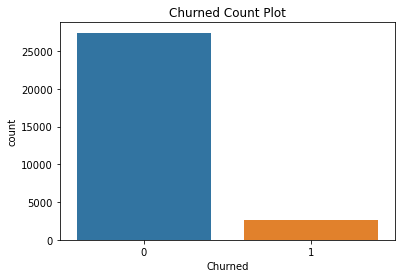

In [52]:
# Churned count plot
plt.title("Churned Count Plot")
sns.countplot(df1["Churned"])

- Insights::
        - We have approx 8% of the churned customers.

In [53]:
recharge_amnt_columns =  df1.columns[df1.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8']

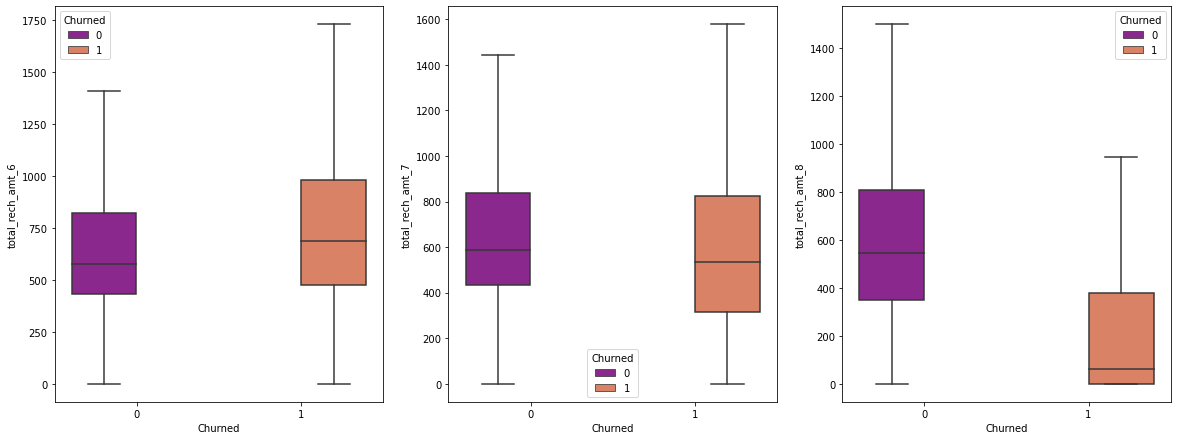

In [54]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["total_rech_amt_6"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["total_rech_amt_7"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=df1, y=df1["total_rech_amt_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()

-Insights::
We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

In [55]:
df1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7       7000701601        109             0.0             0.0             0.0   
97      7000589828        109             0.0             0.0             0.0   
111     7001300706        109             0.0             0.0             0.0   
143     7000106299        109             0.0             0.0             0.0   
188     7000340381        109             0.0             0.0             0.0   

    last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7              6/30/2014            7/31/2014            8/31/2014  1069.180   
97             6/30/2014            7/31/2014            8/31/2014   374.863   
111            6/30/2014            7/31/2014            8/31/2014   596.301   
143            6/30/2014            7/31/2014            8/31/2014   695.609   
188            6/30/2014            7/31/2014            8/31/2014   734.641   

       arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7    1349.850  1987.9344        57.84        54.68    52.290000        453.43   
97    294.023   183.0430       433.59       415.66   221.060000         74.54   
111   146.073     0.0000        55.19         3.26   133.018098         45.51   
143    39.981     0.0000      1325.91        28.61   133.018098         13.91   
188   183.668     0.0000         4.38         0.98   133.018098        105.16   

     offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7          567.16    325.910000          16.23          33.49      31.640000   
97          43.66     31.860000           0.00           0.00       6.160000   
111         12.34    196.574803           0.00           0.00       7.292981   
143          1.89    196.574803           0.00           8.94       7.292981   
188         39.39    196.574803           0.00           0.00       7.292981   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7            23.74          12.59          38.06             51.39   
97            0.00           0.00          23.91              2.83   
111           0.00           0.00           0.00             55.19   
143           0.00           8.53           0.00             18.89   
188           0.00           0.00           0.00              4.38   

     loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7               31.38             40.28            308.63            447.38   
97              16.19              9.73             16.99             23.14   
111              3.26              0.00             43.83             12.34   
143              6.83              0.00              8.58              1.56   
188              0.98              0.00             99.81             38.98   

     loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7              162.28             62.13             55.14             53.23   
97              17.79              3.54              1.46              1.83   
111              0.00              0.00              0.00              0.00   
143              0.00              0.00              0.00              0.00   
188              0.00              5.34              0.41              0.00   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.00               0.0               0.0        422.16   
97               0.40               0.0               0.0         23.38   
111              0.00               0.0               0.0         99.03   
143              2.09               0.0               0.0         27.48   
188              0.00               0.0               0.0        109.54   

     loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7          533.91        255.79              4.30             23.29   
97          40.81         29.36            430.76            399.46   
111         15.61          0.00   

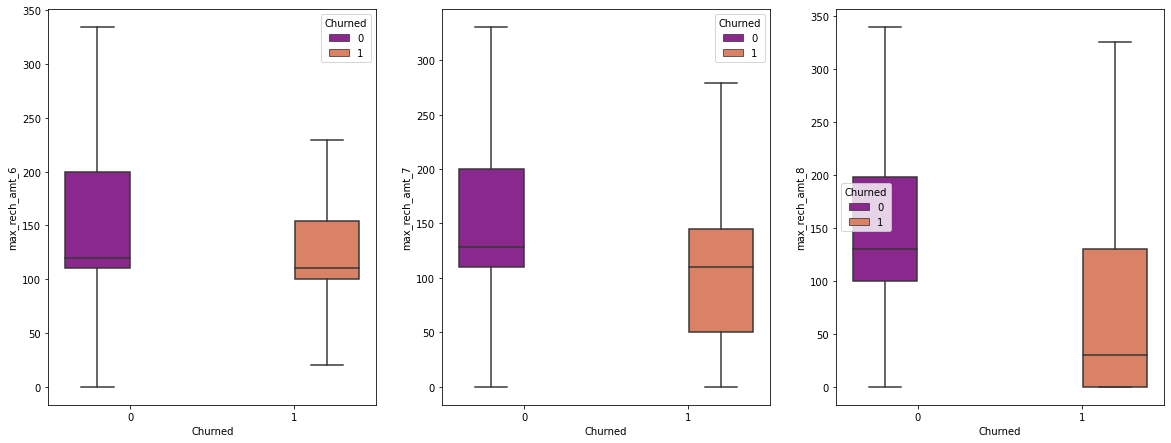

In [56]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["max_rech_amt_6"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["max_rech_amt_7"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=df1, y=df1["max_rech_amt_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()

-Insights::
    -Median of Action Period is very low for Churned customers.

In [57]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = df1.columns[df1.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

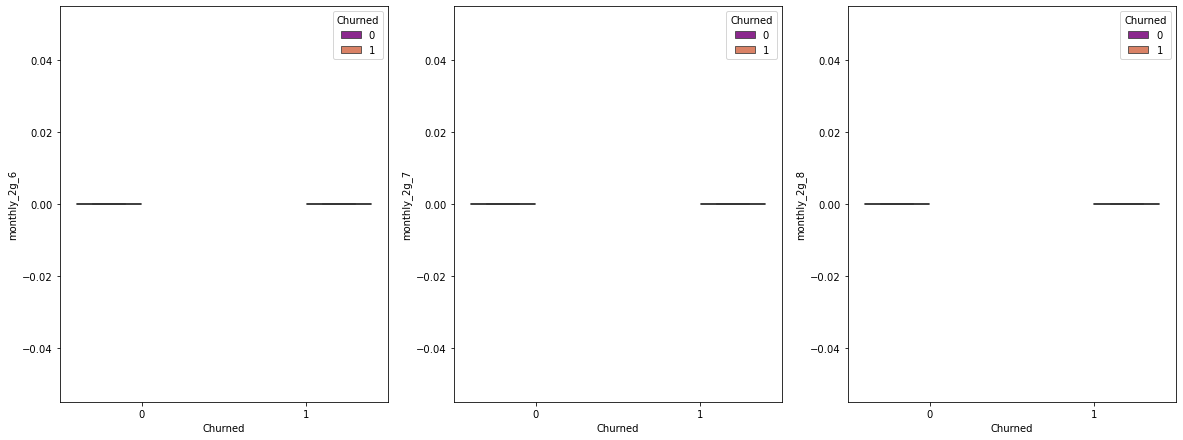

In [58]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["monthly_2g_6"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["monthly_2g_7"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=df1, y=df1["monthly_2g_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()

- Insights::: Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value.

In [59]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.Churned==0].filter(columns_list)
    df_1 = df[df.Churned==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

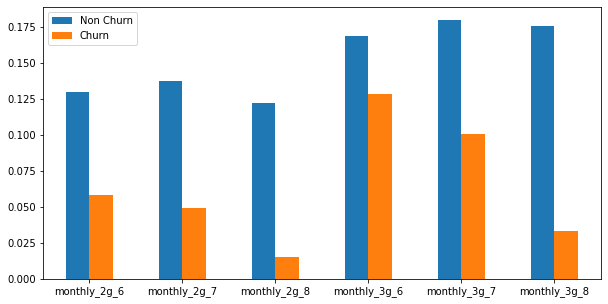

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  \
Non Churn      0.129659      0.137464      0.122037      0.168648   
Churn          0.058619      0.049364      0.015040      0.128808   

           monthly_3g_7  monthly_3g_8  
Non Churn      0.179955      0.176016  
Churn          0.101041      0.033552

In [60]:
plot_mean_bar_chart(df1, monthly_subcription_2g_3g)

- ### We will check for the correlation of continous variables with target.

In [61]:
col=df1.loc[:,df1.columns.str.contains("ic")].columns

<AxesSubplot:>

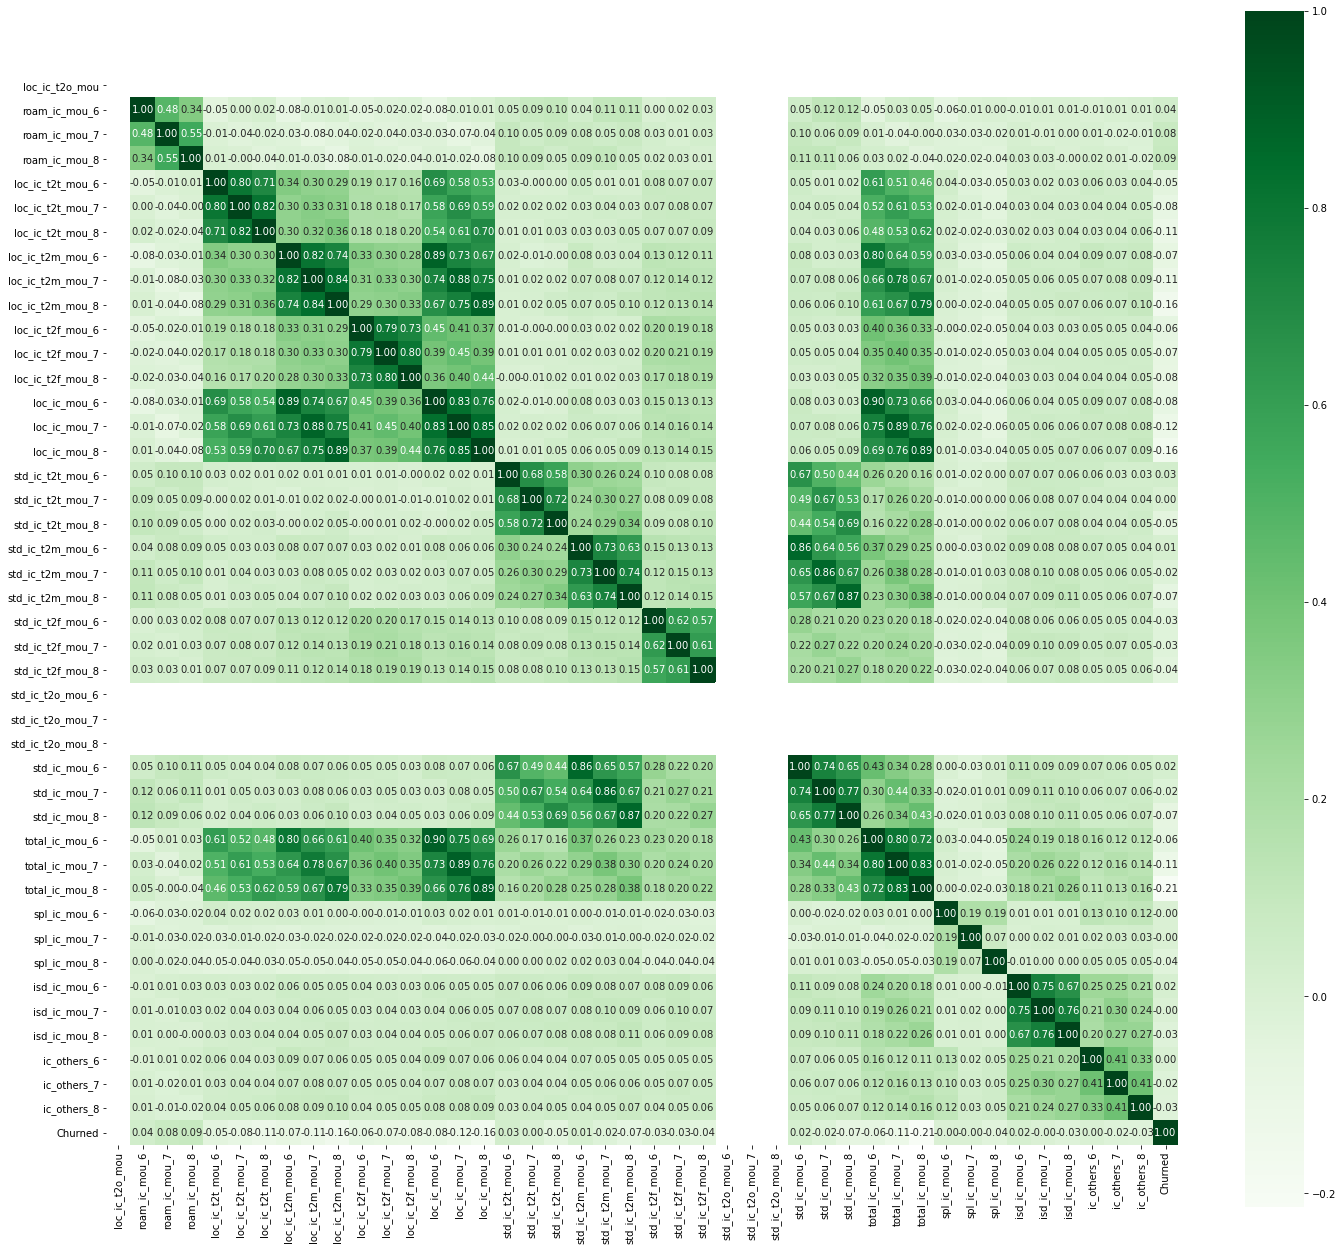

In [62]:
#checking the correlation of incoming variables with the target
var=['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8','Churned']
# Finding out the correlation between the features
cols_corr = df1[var].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(24,22))
sns.heatmap(cols_corr, cbar=True, square= True, fmt='.2f', annot=True, cmap='Greens')


- Insights::
       We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [63]:
print(df1.loc[21,'total_ic_mou_6'],"==",df1.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
df1[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']]
df1[['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']]

207.09 == 207.09


std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6
7                 36.89            91.440             52.19        180.54
97                 0.49             0.000              0.00          0.49
111                0.00             0.000              1.13          1.13
143               25.56             0.000              0.00         25.56
188                0.00             0.000              0.00          0.00
...                 ...               ...               ...           ...
99970              0.00             0.760              0.00          0.76
99974              0.00             6.030             11.33         17.36
99986              2.31            12.140              0.00         14.46
99988             10.08           393.725              1.01        577.89
99997              0.00             0.000              0.00          0.00

[30011 rows x 4 columns]

- Insights: We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [64]:
list_total_ic_cols = df1.columns[df1.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
df1.drop(list_total_ic_cols,axis=1,inplace=True)
list_total_ic_cols.tolist()

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [65]:
df1.shape

(30011, 135)

In [66]:
col=df1.loc[:,df1.columns.str.contains("og")].columns

<AxesSubplot:>

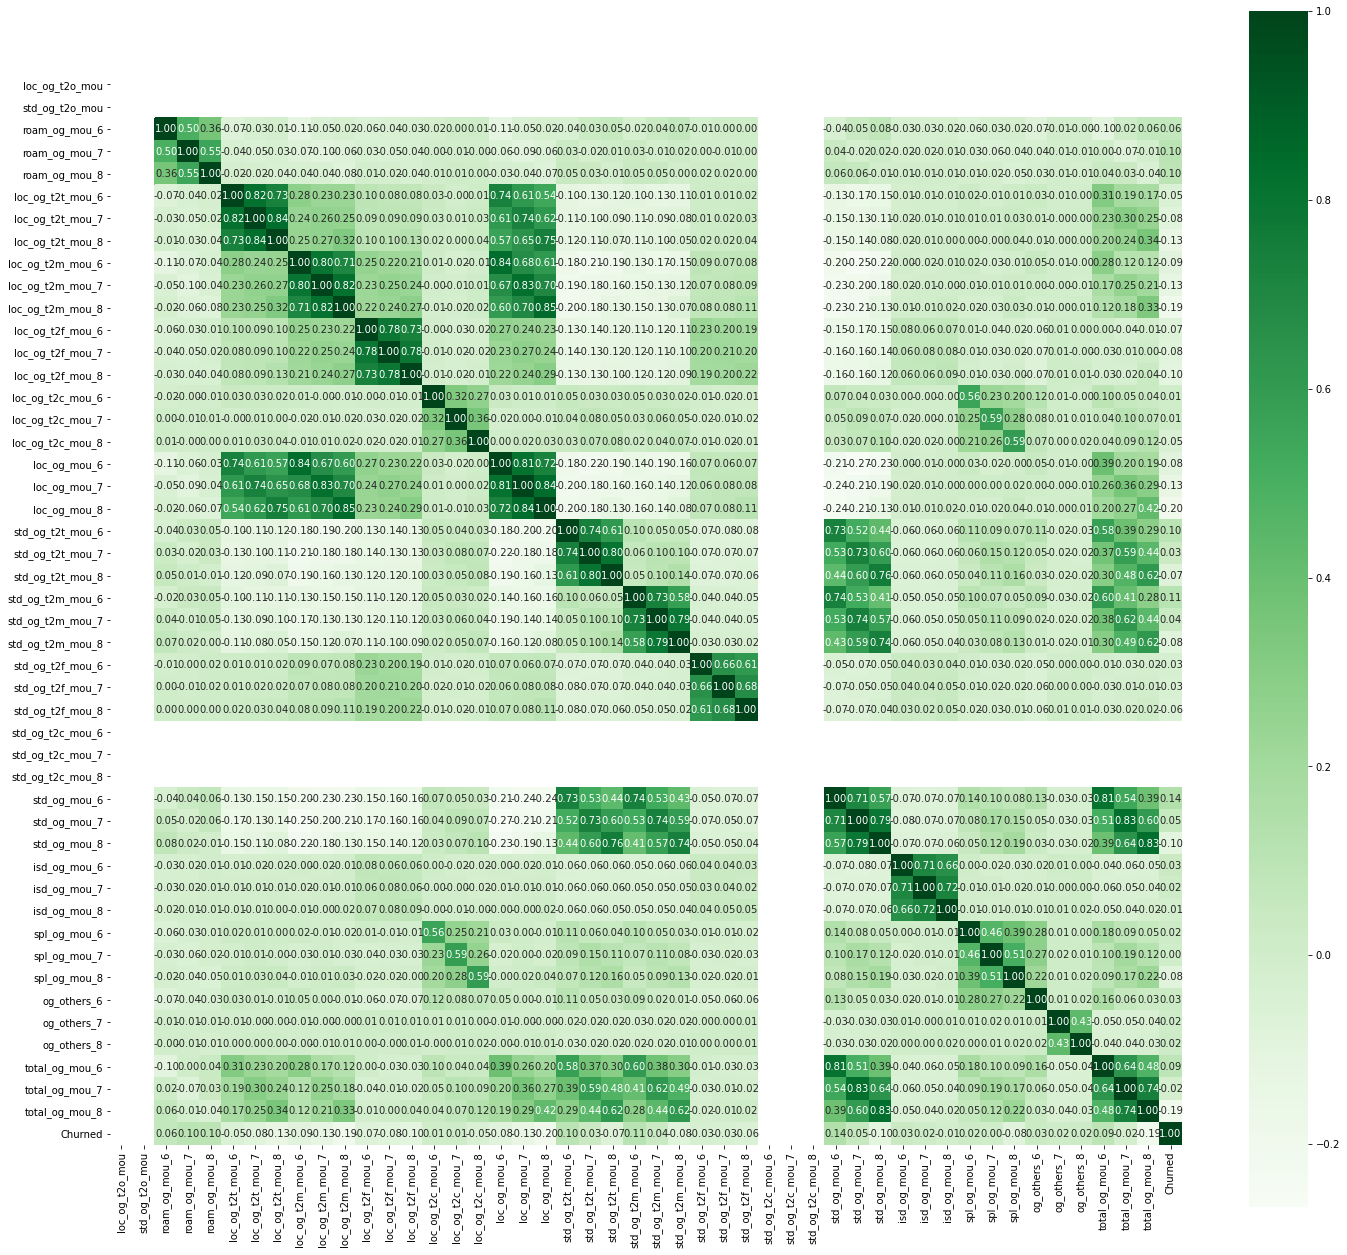

In [67]:
var=['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8','Churned']
# Finding out the correlation between the features
cols_corr = df1[var].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(24,22))
sns.heatmap(cols_corr, cbar=True, square= True, fmt='.2f', annot=True, cmap='Greens')

-Insights::
        'std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8','loc_ic_t2o_mou','std_og_t2c_mou_6', 
        'std_og_t2c_mou_7', 'std_og_t2c_mou_8','loc_og_t2o_mou', 'std_og_t2o_mou' are not at all correlated with the target variable. 
        Hence we can drop them.
        
We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds. total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [68]:
print(df1.loc[21,'total_og_mou_6'],"==",df1.loc[21,['loc_og_mou_6','roam_og_mou_6','isd_og_mou_6','spl_og_mou_6','std_og_mou_6']].sum())
df1[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_mou_6']]
df1[['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']]

860.34 == 860.3299999999999


std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6
7                  4.30             49.89              6.66         60.86
97               430.76             53.59              0.00        484.36
111                0.00              0.00              1.30          1.30
143             1307.01              1.95              0.00       1308.96
188                0.00              0.00              0.00          0.00
...                 ...               ...               ...           ...
99970              0.00            275.53              0.00        275.53
99974              0.00             20.46              9.59         30.06
99986             97.51            186.88              0.00        284.39
99988             29.61             38.04              0.00         67.66
99997              0.00              0.00              0.00          0.00

[30011 rows x 4 columns]

- Insights:: total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [69]:
list_total_og_cols = df1.columns[df1.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
df1.drop(list_total_og_cols,axis=1,inplace=True)
list_total_og_cols.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [70]:
## These variables are not at all correlated with the target variable. Hence we can drop them.
list=['std_ic_t2o_mou_8','loc_ic_t2o_mou', 'std_og_t2c_mou_8','loc_og_t2o_mou', 'std_og_t2o_mou']
df1.drop(list,axis=1,inplace=True)
df1.shape

(30011, 121)

In [71]:
df1.shape

(30011, 121)

In [72]:
# Extracting all the date columns

date_columns = df1.columns[df1.columns.str.contains('date')]
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [73]:
df1[date_columns] = df1[date_columns].astype('datetime64[ns]')

In [74]:
df1.shape

(30011, 121)

### Creating derived variable:

In [75]:
df1.drop(["Avg_6&7"],axis=1,inplace=True)

In [76]:
df1.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7  \
7       7000701601        109           2014-06-30           2014-07-31   
97      7000589828        109           2014-06-30           2014-07-31   
111     7001300706        109           2014-06-30           2014-07-31   
143     7000106299        109           2014-06-30           2014-07-31   
188     7000340381        109           2014-06-30           2014-07-31   

    last_date_of_month_8    arpu_6    arpu_7     arpu_8  onnet_mou_6  \
7             2014-08-31  1069.180  1349.850  1987.9344        57.84   
97            2014-08-31   374.863   294.023   183.0430       433.59   
111           2014-08-31   596.301   146.073     0.0000        55.19   
143           2014-08-31   695.609    39.981     0.0000      1325.91   
188           2014-08-31   734.641   183.668     0.0000         4.38   

     onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7          54.68    52.290000        453.43        567.16    325.910000   
97        415.66   221.060000         74.54         43.66     31.860000   
111         3.26   133.018098         45.51         12.34    196.574803   
143        28.61   133.018098         13.91          1.89    196.574803   
188         0.98   133.018098        105.16         39.39    196.574803   

     roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7            16.23          33.49      31.640000          23.74   
97            0.00           0.00       6.160000           0.00   
111           0.00           0.00       7.292981           0.00   
143           0.00           8.94       7.292981           0.00   
188           0.00           0.00       7.292981           0.00   

     roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7            12.59          38.06             51.39             31.38   
97            0.00          23.91              2.83             16.19   
111           0.00           0.00             55.19              3.26   
143           8.53           0.00             18.89              6.83   
188           0.00           0.00              4.38              0.98   

     loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
7               40.28            308.63            447.38            162.28   
97               9.73             16.99             23.14             17.79   
111              0.00             43.83             12.34              0.00   
143              0.00              8.58              1.56              0.00   
188              0.00             99.81             38.98              0.00   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
7               62.13             55.14             53.23              0.00   
97               3.54              1.46              1.83              0.40   
111              0.00              0.00              0.00              0.00   
143              0.00              0.00              0.00              2.09   
188              5.34              0.41              0.00              0.00   

     loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7                 0.0               0.0              4.30             23.29   
97                0.0               0.0            430.76            399.46   
111               0.0               0.0              0.00              0.00   
143               0.0               0.0           1307.01             13.58   
188               0.0               0.0              0.00              0.00   

     std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7               12.01             49.89             31.76             49.14   
97             191.31             53.59             13.81              8.33   
111              0.00              0.00              0.00              0.00   
143              0.00              1.95              0.00              0.00   
188     

We will merge most of the columns related to month 6 & 7 so to reduce the number of features.
By doing this apporach we have reduced the fetures from 121 to 78.

In [77]:
df1.drop(df1.filter(regex='date_').columns,axis=1,inplace=True)
print (df1.shape)

col_list = df1.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df1[avg_col_name] = (df1[col_6]  + df1[col_7])/ 2

(30011, 114)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_t2c_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_t2o_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g


In [78]:
col_list_to_drop = df1.filter(regex='_6|_7')
df1.drop(col_list_to_drop,axis=1,inplace=True)
print (df1.shape)

(30011, 78)


In [79]:
df1.head()

mobile_number  circle_id     arpu_8  onnet_mou_8  offnet_mou_8  \
7       7000701601        109  1987.9344    52.290000    325.910000   
97      7000589828        109   183.0430   221.060000     31.860000   
111     7001300706        109     0.0000   133.018098    196.574803   
143     7000106299        109     0.0000   133.018098    196.574803   
188     7000340381        109     0.0000   133.018098    196.574803   

     roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
7        31.640000          38.06             40.28            162.28   
97        6.160000          23.91              9.73             17.79   
111       7.292981           0.00              0.00              0.00   
143       7.292981           0.00              0.00              0.00   
188       7.292981           0.00              0.00              0.00   

     loc_og_t2f_mou_8  loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               53.23               0.0             12.01             49.14   
97               1.83               0.0            191.31              8.33   
111              0.00               0.0              0.00              0.00   
143              0.00               0.0              0.00              0.00   
188              0.00               0.0              0.00              0.00   

     std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7               16.68         10.01          6.50          0.0   
97               0.00          0.00          2.01          0.0   
111              0.00          0.00          0.00          0.0   
143              0.00          0.00          0.00          0.0   
188              0.00          0.00          0.00          0.0   

     loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
7           27.310000        121.190000         39.530000         30.390000   
97           4.460000         26.630000          0.000000          1.060000   
111         47.211362        108.460515         11.751834          9.883921   
143         47.211362        108.460515         11.751834          9.883921   
188         47.211362        108.460515         11.751834          9.883921   

     std_ic_t2m_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
7          141.330000         22.210000      0.000000     31.590000   
97           0.000000          0.000000      0.000000      0.000000   
111         21.183211          2.085004      0.040361      8.442001   
143         21.183211          2.085004      0.040361      8.442001   
188         21.183211          2.085004      0.040361      8.442001   

     ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
7        15.1400                 7            2341.9             951   
97        0.0000                14             206.0              36   
111       0.9708                 5               0.0               0   
143       0.9708                 4               0.0               0   
188       0.9708                 0               0.0               0   

     last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  monthly_2g_8  sachet_2g_8  \
7                   619          0.0          0.0             0            0   
97                    0          0.0          0.0             0            0   
111                   0          0.0          0.0             0            0   
143                   0          0.0          0.0             0            0   
188                   0          0.0          0.0             0            0   

     monthly_3g_8  sachet_3g_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
7               0            0  802       57.74       19.38       18.74   
97              0            0  502        0.00        0.00        0.00   
111             0            0  332        0.00        0.00        0.00   
143             0            0  264        0.00        0.00        0.00   
188             0            0  244        0.00      831.48     1223.04   



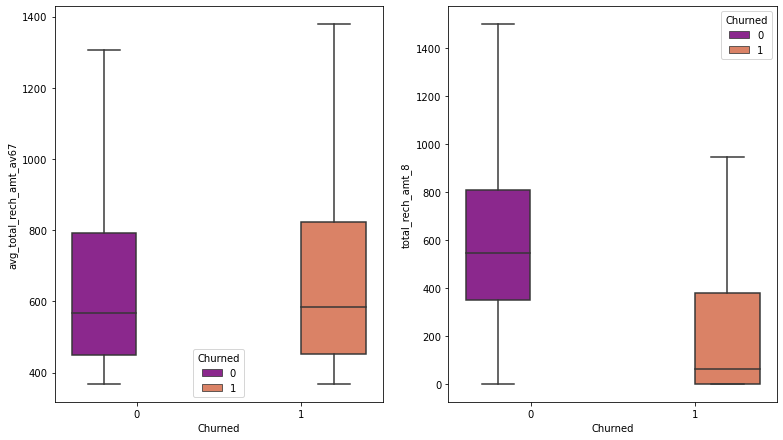

In [80]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["avg_total_rech_amt_av67"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["total_rech_amt_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()

-Insights::  Median of recharge amount for Action Period is very low for Churned customers.

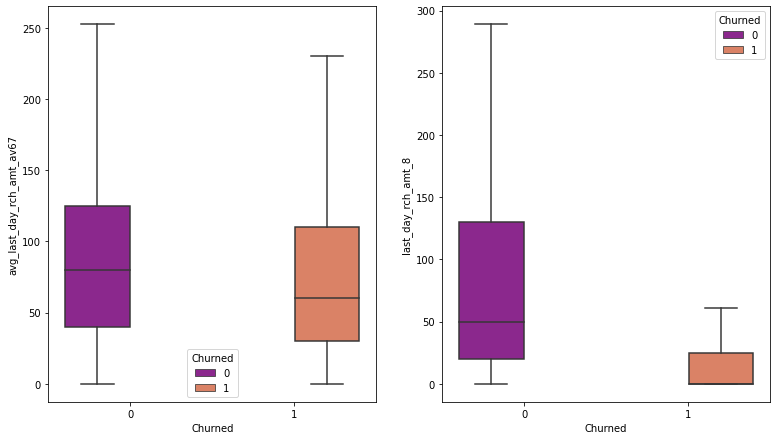

In [81]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["avg_last_day_rch_amt_av67"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["last_day_rch_amt_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()


-Insights:: We are getting a huge drop in 8th month recharge amount for churned customers.

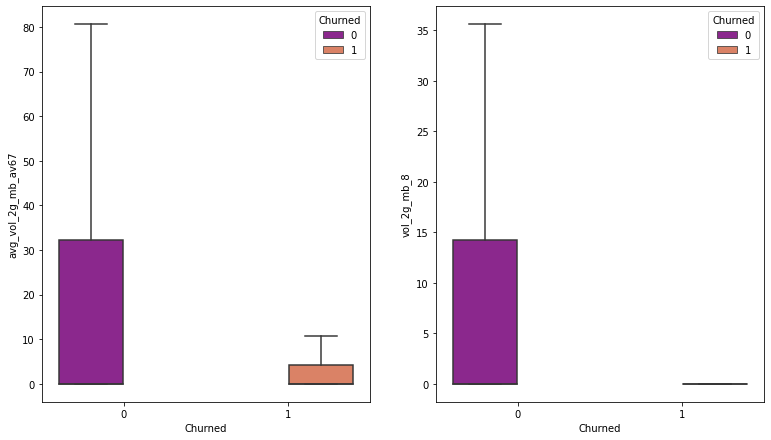

In [82]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["avg_vol_2g_mb_av67"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["vol_2g_mb_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()

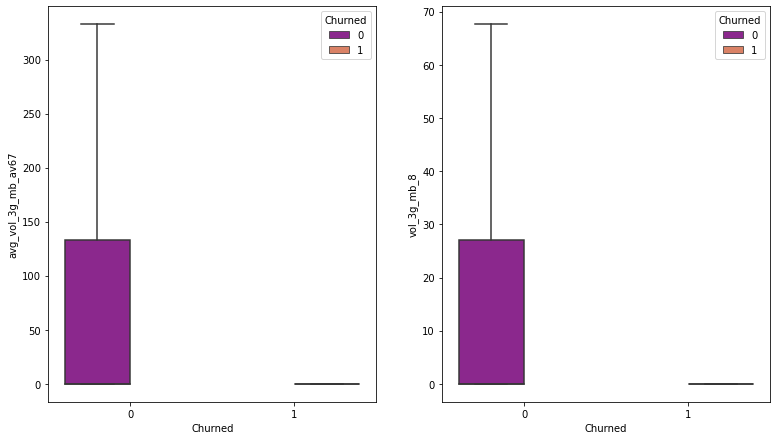

In [83]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df1, y=df1["avg_vol_3g_mb_av67"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=df1, y=df1["vol_3g_mb_8"],x="Churned",hue="Churned",
                showfliers=False,palette=("plasma"))
plt.show()

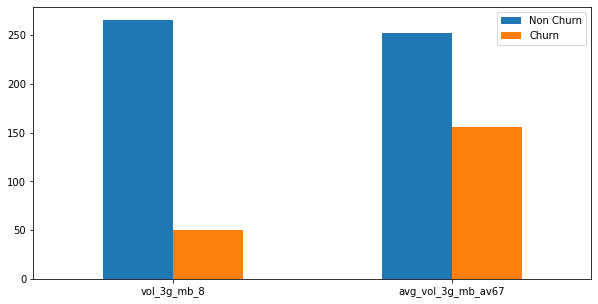

vol_3g_mb_8  avg_vol_3g_mb_av67
Non Churn   265.562155          252.741568
Churn        49.684431          155.541190

In [84]:
vol_column = df1.columns[df1.columns.str.contains('vol_3g')]
vol_column.tolist()

plot_mean_bar_chart(df1, vol_column)

-Insights::
  1) We see that 2G/3G usage is higher for non-churned customers and low for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

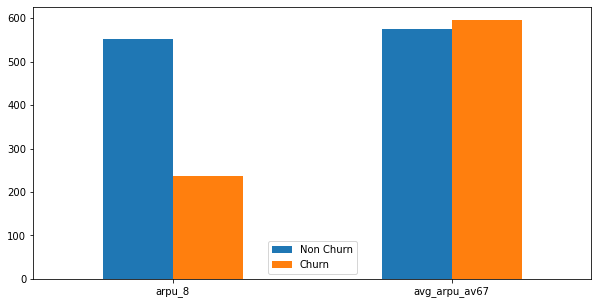

arpu_8  avg_arpu_av67
Non Churn  551.467386     576.575751
Churn      237.671743     596.120039

In [85]:
arpu_cols = df1.columns[df1.columns.str.contains('arpu')]
arpu_cols.tolist()

plot_mean_bar_chart(df1, arpu_cols)

-- Insights: We can see that huge drops for Arpu in 8th month for churned customers

## Test-Train split

In [86]:
#importing libraries
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [87]:
# Putting feature variable to X
X=df1.drop(["circle_id","Churned","mobile_number"],axis=1)
X.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_arpu_av67',
       'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67',
       'avg_roam_og_mou_av67', 'avg_loc_og_t2t_mou_av67',
       'avg_loc_og_t2m_mou_av67', 'avg_loc_og_t2f_mou_av67',
       'avg_loc_og_t2c_mou_av67', 'avg_std_og_t

In [88]:
X.shape

(30011, 75)

In [89]:
#Putting Churn column in y
y=df1["Churned"]
y.head()

7      1
97     1
111    1
143    1
188    1
Name: Churned, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,stratify=y, random_state=100)

## Feature Scaling

In [91]:
columns=X.select_dtypes(include=np.number).columns

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

X_train[columns] = scaler.fit_transform(X_train[columns])

X_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
76985  0.510096     0.905877     -0.513201       4.751481       6.675327   
77814  0.389567     2.127241     -0.600057      -0.269513      -0.280912   
24787 -0.198284    -0.362979     -0.489843      -0.269513      -0.280912   
60192  0.027768    -0.655871     -0.924971      -0.269513      -0.280912   
69896 -0.725974    -0.369188      0.147110      -0.269513      -0.280912   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
76985         -0.519007         -0.783227         -0.426188         -0.128044   
77814          0.681760         -0.548330         -0.426188         -0.335051   
24787          0.265802          0.014829         -0.346433         -0.328226   
60192         -0.547006         -0.795183         -0.426188         -0.335051   
69896         -0.545061          1.093711         -0.426188         -0.335051   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
76985         -0.121765         -0.426369         -0.241659     -0.154381   
77814          2.181230         -0.269776         -0.241659     -0.154381   
24787         -0.465101         -0.486156         -0.241659     -0.154381   
60192         -0.465101         -0.506313         -0.241659     -0.154381   
69896         -0.141723         -0.399117         -0.241659     -0.154381   

       spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
76985      0.199493    -0.105242         -0.636181         -0.780993   
77814     -0.102508    -0.105242          0.344711         -0.557710   
24787     -0.424099    -0.105242          0.222547          0.724981   
60192     -0.492661    -0.105242         -0.639866         -0.852068   
69896      0.152969    -0.105242         -0.363629         -0.147077   

       loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
76985         -0.466933          0.336769          0.004814         -0.292785   
77814         -0.466933          0.642198         -0.458280         -0.292785   
24787         -0.213508         -0.396901         -0.156014          0.643783   
60192         -0.466933         -0.396901         -0.480519         -0.292785   
69896         -0.466933          6.485620          0.278081         -0.278287   

       spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
76985     -0.269802     -0.266142    -0.271859         -0.237354   
77814     -0.269802     -0.266142    -0.271859          0.685570   
24787     -0.269802      0.069517    -0.271859         -0.814181   
60192     -0.269802     -0.266142    -0.271859          1.839225   
69896     -0.269802     -0.266142    -0.221782         -0.583450   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
76985          0.441522        0.475676            0.524634    -0.222351   
77814          0.412759       -0.111336           -0.381582    -0.317666   
24787         -0.027533        1.235339            1.430850    -0.317666   
60192          0.067605       -0.746691           -0.463141     0.128572   
69896         -0.246573       -0.208021            0.343391    -0.317666   

       vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
76985     0.073122      2.562960    -0.372406     -0.325863    -0.217937   
77814    -0.384390     -0.324218    -0.372406     -0.325863    -0.217937   
24787    -0.384390     -0.324218    -0.372406     -0.325863    -0.217937   
60192     4.070999     -0.324218     5.528376     -0.325863     6.793078   
69896    -0.384390     -0.324218    -0.372406     -0.325863    -0.217937   

            aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
76985 -1.102560    0.553986   -0.372366   -0.355655   -0.138244   
77814 -0.831750   -0.377708   -0.372366   -0.355655   -0.138244   
24787  0.415618    0.265947    1.426616    1.763214   -0.138244   
60192  0.160195    1.460854    2.170471    0.940046   -0.138244   
69896 -0.902530   -0.377

- Checking for Imbalance in data

In [94]:
### Checking the Churn Rate
churn = (sum(df1['Churned'])/len(df1['Churned'].index))*100
churn

8.64016527273333

# Model Building:

## 1. Logistic Regression

In [95]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [96]:
X_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
76985  0.510096     0.905877     -0.513201       4.751481       6.675327   
77814  0.389567     2.127241     -0.600057      -0.269513      -0.280912   
24787 -0.198284    -0.362979     -0.489843      -0.269513      -0.280912   
60192  0.027768    -0.655871     -0.924971      -0.269513      -0.280912   
69896 -0.725974    -0.369188      0.147110      -0.269513      -0.280912   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
76985         -0.519007         -0.783227         -0.426188         -0.128044   
77814          0.681760         -0.548330         -0.426188         -0.335051   
24787          0.265802          0.014829         -0.346433         -0.328226   
60192         -0.547006         -0.795183         -0.426188         -0.335051   
69896         -0.545061          1.093711         -0.426188         -0.335051   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
76985         -0.121765         -0.426369         -0.241659     -0.154381   
77814          2.181230         -0.269776         -0.241659     -0.154381   
24787         -0.465101         -0.486156         -0.241659     -0.154381   
60192         -0.465101         -0.506313         -0.241659     -0.154381   
69896         -0.141723         -0.399117         -0.241659     -0.154381   

       spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
76985      0.199493    -0.105242         -0.636181         -0.780993   
77814     -0.102508    -0.105242          0.344711         -0.557710   
24787     -0.424099    -0.105242          0.222547          0.724981   
60192     -0.492661    -0.105242         -0.639866         -0.852068   
69896      0.152969    -0.105242         -0.363629         -0.147077   

       loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
76985         -0.466933          0.336769          0.004814         -0.292785   
77814         -0.466933          0.642198         -0.458280         -0.292785   
24787         -0.213508         -0.396901         -0.156014          0.643783   
60192         -0.466933         -0.396901         -0.480519         -0.292785   
69896         -0.466933          6.485620          0.278081         -0.278287   

       spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
76985     -0.269802     -0.266142    -0.271859         -0.237354   
77814     -0.269802     -0.266142    -0.271859          0.685570   
24787     -0.269802      0.069517    -0.271859         -0.814181   
60192     -0.269802     -0.266142    -0.271859          1.839225   
69896     -0.269802     -0.266142    -0.221782         -0.583450   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
76985          0.441522        0.475676            0.524634    -0.222351   
77814          0.412759       -0.111336           -0.381582    -0.317666   
24787         -0.027533        1.235339            1.430850    -0.317666   
60192          0.067605       -0.746691           -0.463141     0.128572   
69896         -0.246573       -0.208021            0.343391    -0.317666   

       vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
76985     0.073122      2.562960    -0.372406     -0.325863    -0.217937   
77814    -0.384390     -0.324218    -0.372406     -0.325863    -0.217937   
24787    -0.384390     -0.324218    -0.372406     -0.325863    -0.217937   
60192     4.070999     -0.324218     5.528376     -0.325863     6.793078   
69896    -0.384390     -0.324218    -0.372406     -0.325863    -0.217937   

            aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
76985 -1.102560    0.553986   -0.372366   -0.355655   -0.138244   
77814 -0.831750   -0.377708   -0.372366   -0.355655   -0.138244   
24787  0.415618    0.265947    1.426616    1.763214   -0.138244   
60192  0.160195    1.460854    2.170471    0.940046   -0.138244   
69896 -0.902530   -0.377

In [97]:
# Training the model

lreg = LogisticRegression(random_state=42)
lreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [98]:
# Predicting on the test set

y_pred = lreg.predict(X_test)

In [99]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.83996001776988
F1 score:  0.40380637153496063
Recall:  0.6272493573264781
Precision:  0.29774252593044537

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      8226
           1       0.30      0.63      0.40       778

    accuracy                           0.84      9004
   macro avg       0.63      0.74      0.66      9004
weighted avg       0.90      0.84      0.86      9004


 confussion matrix:
 [[7075 1151]
 [ 290  488]]


### Correcting Class Imbalance by Random Over Sampling

In [100]:
# Random OverSampling
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

38384

In [101]:
y_resampled_os.shape

(38384,)

In [102]:
from collections import Counter
print(sorted(Counter(y_resampled_os).items()))

[(0, 19192), (1, 19192)]


In [103]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [104]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.6985784095957353
F1 score:  0.30159547092125577
Recall:  0.7532133676092545
Precision:  0.18854568854568854

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.81      8226
           1       0.19      0.75      0.30       778

    accuracy                           0.70      9004
   macro avg       0.58      0.72      0.55      9004
weighted avg       0.90      0.70      0.76      9004


 confussion matrix:
 [[5704 2522]
 [ 192  586]]


We can see that after performing class imbalance teqhnique i.e Random oversampling the accuracy and recall have balanced.

## Decision Tree

In [105]:
# Importing required packages for building the model

from sklearn.tree import DecisionTreeClassifier

In [106]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from graphviz import Source
from sklearn import tree

### Creating helper functions to evaluate model performance and help plot the decision tree

In [107]:
def get_dt_graph(dt_classifier):
    dot_data = export_graphviz(dt, out_file=None, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Churn', "Churn"])

    graph = graphviz.Source(dot_data)
    return graph

In [108]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [109]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
X_train.shape,X_test.shape

((21007, 75), (9004, 75))

### Without setting any hyper-parameters



In [110]:
# Training the model

dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [111]:
# Fitting the dt model

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [112]:
# Predicting from the fitted model

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [113]:
# Decision tree with no Hyper parameters

get_dt_graph(dt)

#### We can see that the plot is very huge without any parameters

### Evaluation of model

In [114]:
# Importing required libraries to evaluate the model

from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

In [115]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8230
           1       0.46      0.46      0.46       774

    accuracy                           0.91      9004
   macro avg       0.70      0.70      0.70      9004
weighted avg       0.91      0.91      0.91      9004



In [116]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[19188     0]
 [    0  1819]]
--------------------------------------------------
Test Accuracy : 0.9065970679697912
Test Confusion Matrix:
[[7806  424]
 [ 417  357]]


### Plot of the ROC curve

In [117]:
from sklearn.metrics import plot_roc_curve

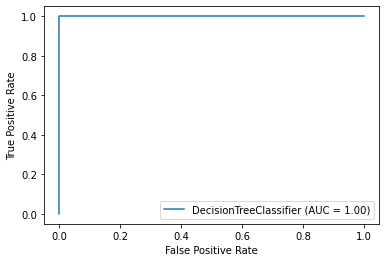

In [118]:
# For Train sets

plot_roc_curve(dt, X_train, y_train, drop_intermediate=False)
plt.show()

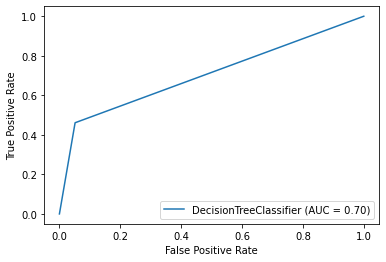

In [119]:
# For Test sets

plot_roc_curve(dt, X_test, y_test, drop_intermediate=False)
plt.show()

## Hyper-parameter tuning

In [120]:
# Training the model againn 

dt_hype = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [121]:
# Import the RandomSearchCV for hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

In [122]:
# Create the parameter grid

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [123]:
# Instantiate the Random search model

Randomized_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=params, 
                           cv=None, n_jobs=-1, verbose=1, scoring = "accuracy")

In [124]:
%%time
Randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.6s finished


Wall time: 24.6 s


RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='accuracy', verbose=1)

In [125]:
result_df = pd.DataFrame(Randomized_search.cv_results_)
result_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.409348      0.011693         0.015624    9.881741e-03   
1       1.396778      0.052844         0.012500    6.249809e-03   
2       0.565587      0.006249         0.012500    6.250096e-03   
3       2.284218      0.040017         0.015625    8.529922e-07   
4       0.853066      0.012500         0.012500    6.249905e-03   

  param_min_samples_leaf param_max_depth param_criterion  \
0                     20               2            gini   
1                     20               5         entropy   
2                      5               2         entropy   
3                     10              10         entropy   
4                    100               5            gini   

                                              params  split0_test_score  \
0  {'min_samples_leaf': 20, 'max_depth': 2, 'crit...           0.845550   
1  {'min_samples_leaf': 20, 'max_depth': 5, 'crit...           0.814374   
2  {'min_samples_leaf': 5, 'max_depth': 2, 'crite...           0.758686   
3  {'min_samples_leaf': 10, 'max_depth': 10, 'cri...           0.846264   
4  {'min_samples_leaf': 100, 'max_depth': 5, 'cri...           0.838172   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.848881           0.751964           0.857653           0.842657   
1           0.830557           0.842657           0.808617           0.844799   
2           0.758924           0.751964           0.755058           0.745299   
3           0.851023           0.854082           0.861700           0.861938   
4           0.866254           0.840514           0.862176           0.867174   

   mean_test_score  std_test_score  rank_test_score  
0         0.829341        0.039014                7  
1         0.828201        0.014593                9  
2         0.753986        0.005044               10  
3         0.855001        0.006099                2  
4         0.854858        0.012801                3

In [126]:
result_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6       0.862441      0.006250         0.015624    7.893059e-07   
3       2.284218      0.040017         0.015625    8.529922e-07   
4       0.853066      0.012500         0.012500    6.249905e-03   
8       2.462330      0.016562         0.015624    2.148415e-06   
7       1.565866      0.016604         0.012905    5.447914e-03   

  param_min_samples_leaf param_max_depth param_criterion  \
6                     50               5            gini   
3                     10              10         entropy   
4                    100               5            gini   
8                     20              10         entropy   
7                     10              10            gini   

                                              params  split0_test_score  \
6  {'min_samples_leaf': 50, 'max_depth': 5, 'crit...           0.840790   
3  {'min_samples_leaf': 10, 'max_depth': 10, 'cri...           0.846264   
4  {'min_samples_leaf': 100, 'max_depth': 5, 'cri...           0.838172   
8  {'min_samples_leaf': 20, 'max_depth': 10, 'cri...           0.842694   
7  {'min_samples_leaf': 10, 'max_depth': 10, 'cri...           0.838172   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.868158           0.841704           0.870031           0.865746   
3           0.851023           0.854082           0.861700           0.861938   
4           0.866254           0.840514           0.862176           0.867174   
8           0.850071           0.841942           0.858843           0.866460   
7           0.855069           0.849322           0.843847           0.855987   

   mean_test_score  std_test_score  rank_test_score  
6         0.857286        0.013169                1  
3         0.855001        0.006099                2  
4         0.854858        0.012801                3  
8         0.852002        0.009459                4  
7         0.848479        0.006756                5

In [127]:
Randomized_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=50, random_state=42)

In [128]:
# Best estimated parameters

dt_best = Randomized_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=50, random_state=42)

In [129]:
# Evaluation of the test model

evaluate_model(dt_best)

Train Accuracy : 0.8541438568096349
Train Confusion Matrix:
[[16373  2815]
 [  249  1570]]
--------------------------------------------------
Test Accuracy : 0.8455131052865393
Test Confusion Matrix:
[[6966 1264]
 [ 127  647]]


In [130]:
# Importing required libraries

from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8230
           1       0.34      0.84      0.48       774

    accuracy                           0.85      9004
   macro avg       0.66      0.84      0.70      9004
weighted avg       0.93      0.85      0.87      9004



In [132]:
# Building the model with best estimated parameters

dt_final = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=10,random_state=42)

dt_final.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=10, random_state=42)

In [133]:
Predicted_Result = dt_final.predict(X_test)

In [134]:

from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, Predicted_Result )
confusion_rm_f


array([[7314,  916],
       [ 225,  549]], dtype=int64)

In [135]:

TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,Predicted_Result))
# Let's see the sensitivity of our logistic regression model
print('Recall: ', TP / float(TP+FN))

Accuracy Score:  0.8732785428698356
Recall:  0.7093023255813954


### Plot of ROC curve for the best estimator

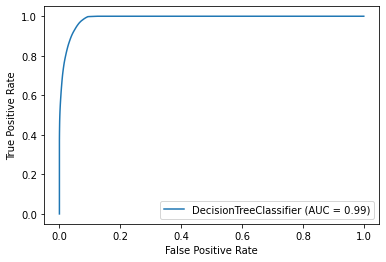

In [136]:
plot_roc_curve(dt_final, X_train, y_train)
plt.show()

# Random Forest

## Without Hyperparameter Tuning

In [137]:
# Importing Required libraries

from sklearn.ensemble import RandomForestClassifier

In [138]:
# Training the model

rf = RandomForestClassifier(class_weight='balanced', random_state=42, oob_score=True)

In [139]:
%%time
rf.fit(X_train, y_train)

Wall time: 12.6 s


RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [140]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [141]:
rf.oob_score_

0.9394487551768458

### Plot of the ROC curve

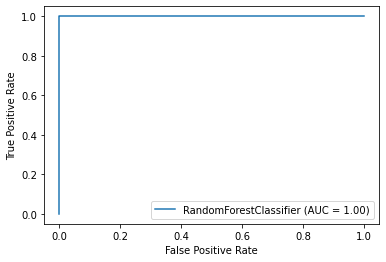

In [142]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [143]:
evaluate_model(rf)

Train Accuracy : 1.0
Train Confusion Matrix:
[[19188     0]
 [    0  1819]]
--------------------------------------------------
Test Accuracy : 0.9391381608174145
Test Confusion Matrix:
[[8101  129]
 [ 419  355]]


## Hyper-parameter tuning for the Random Forest

In [144]:
# Training the model again

rf = RandomForestClassifier(random_state=42,class_weight='balanced', n_jobs=-1)

In [145]:
# Importing library for Randomsearch parameters

from sklearn.model_selection import RandomizedSearchCV

In [146]:
# Create the parameter grid

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [4, 8, 14, 20, 24],
    'n_estimators': [10, 30,50,70,90,110,130,150],
    'min_samples_split': [50,70,90,110,130,150]
}

In [147]:
Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [148]:
%%time
Randomized_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


Wall time: 1min 14s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 5, 10, 20],
                                        'max_features': [4, 8, 14, 20, 24],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [50, 70, 90, 110,
                                                              130, 150],
                                        'n_estimators': [10, 30, 50, 70, 90,
                                                         110, 130, 150]},
                   scoring='accuracy', verbose=1)

In [149]:
Randomized_search.best_score_

0.9141239535413629

In [150]:
# Finding the best estimator

rf_best = Randomized_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=20,
                       min_samples_leaf=20, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=42)

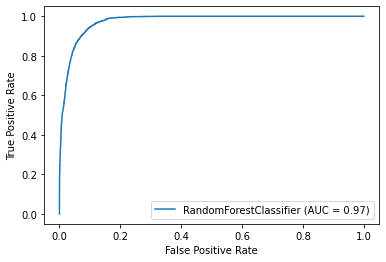

In [151]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [165]:
# Model for the best estimator

from sklearn.ensemble import RandomForestClassifier
rf_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=10, 
                             min_samples_split=90,
                             max_features=8,
                             n_estimators=50)

In [167]:
rf_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=10, min_samples_split=90,
                       n_estimators=50)

In [168]:
result = rf_final.predict(X_test)

In [155]:

from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, result )
confusion_rm_f


array([[7611,  619],
       [ 166,  608]], dtype=int64)

In [156]:

TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,result))
# Let's see the sensitivity of our logistic regression model
print('Recall_Score: ', TP / float(TP+FN))

Accuracy Score:  0.9128165259884495
Recall_Score:  0.7855297157622739


In [157]:
# Finding Important variables

rf_best.feature_importances_

array([6.96696390e-02, 3.94952003e-03, 6.66033125e-03, 1.49433285e-01,
       6.43086721e-02, 8.70253040e-02, 7.13976992e-02, 3.13100213e-02,
       1.78657810e-03, 5.63059406e-03, 4.19856775e-03, 1.29462460e-03,
       3.18081253e-03, 5.16305286e-03, 1.58922882e-03, 2.73233890e-02,
       4.11882025e-02, 8.23070812e-03, 3.91042016e-03, 7.95380125e-03,
       3.06512951e-03, 3.61135225e-05, 2.03535459e-03, 1.88935442e-03,
       2.94663137e-03, 1.11744355e-01, 2.22647119e-02, 7.25255162e-02,
       7.57062845e-03, 3.34901101e-03, 1.51873756e-03, 7.98069831e-04,
       1.22234782e-03, 2.93479488e-05, 9.58588380e-03, 4.52952643e-03,
       3.26107374e-04, 4.32984367e-04, 1.65597399e-03, 9.75892236e-03,
       7.80531733e-03, 4.73602693e-03, 6.55804520e-03, 8.80060785e-03,
       5.64585849e-03, 8.80188323e-03, 7.42020296e-03, 1.41124726e-03,
       4.06677288e-03, 6.60592753e-03, 1.71168367e-03, 0.00000000e+00,
       1.62101543e-03, 6.39034060e-03, 1.18081496e-03, 5.35748283e-03,
      

In [158]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [159]:
imp_df=imp_df.sort_values(by="Imp", ascending=False)
imp_df

Varname       Imp
3               roam_ic_mou_8  0.149433
25           total_rech_amt_8  0.111744
5            loc_og_t2t_mou_8  0.087025
27         last_day_rch_amt_8  0.072526
6            loc_og_t2m_mou_8  0.071398
0                      arpu_8  0.069670
4               roam_og_mou_8  0.064309
16           loc_ic_t2m_mou_8  0.041188
7            loc_og_t2f_mou_8  0.031310
15           loc_ic_t2t_mou_8  0.027323
26             max_rech_amt_8  0.022265
65    avg_total_rech_num_av67  0.014187
39              avg_arpu_av67  0.009759
34                        aon  0.009586
45    avg_loc_og_t2m_mou_av67  0.008802
43       avg_roam_og_mou_av67  0.008801
17           loc_ic_t2f_mou_8  0.008231
19           std_ic_t2m_mou_8  0.007954
40         avg_onnet_mou_av67  0.007805
28                vol_2g_mb_8  0.007571
66    avg_total_rech_amt_av67  0.007504
46    avg_loc_og_t2f_mou_av67  0.007420
56    avg_loc_ic_t2m_mou_av67  0.007283
2                offnet_mou_8  0.006660
49    avg_std_og_t2m_mou_av67  0.006606
42       avg_roam_ic_mou_av67  0.006558
53        avg_spl_og_mou_av67  0.006390
67      avg_max_rech_amt_av67  0.006253
44    avg_loc_og_t2t_mou_av67  0.005646
9            std_og_t2t_mou_8  0.005631
57    avg_loc_ic_t2f_mou_av67  0.005386
55    avg_loc_ic_t2t_mou_av67  0.005357
13               spl_og_mou_8  0.005163
59    avg_std_ic_t2m_mou_av67  0.005061
41        avg_offnet_mou_av67  0.004736
68  avg_last_day_rch_amt_av67  0.004602
35                 aug_vbc_3g  0.004530
10           std_og_t2m_mou_8  0.004199
48    avg_std_og_t2t_mou_av67  0.004067
1                 onnet_mou_8  0.003950
18           std_ic_t2t_mou_8  0.003910
29                vol_3g_mb_8  0.003349
58    avg_std_ic_t2t_mou_av67  0.003323
60    avg_std_ic_t2f_mou_av67  0.003309
12               isd_og_mou_8  0.003181
20           std_ic_t2f_mou_8  0.003065
24           total_rech_num_8  0.002947
63        avg_isd_ic_mou_av67  0.002561
69         avg_vol_2g_mb_av67  0.002546
62        avg_spl_ic_mou_av67  0.002195
22               isd_ic_mou_8  0.002035
23                ic_others_8  0.001889
8            loc_og_t2c_mou_8  0.001787
64         avg_ic_others_av67  0.001754
50    avg_std_og_t2f_mou_av67  0.001712
38                 sep_vbc_3g  0.001656
52        avg_isd_og_mou_av67  0.001621
14                og_others_8  0.001589
30               monthly_2g_8  0.001519
47    avg_loc_og_t2c_mou_av67  0.001411
70         avg_vol_3g_mb_av67  0.001347
11           std_og_t2f_mou_8  0.001295
32               monthly_3g_8  0.001222
72         avg_sachet_2g_av67  0.001191
54         avg_og_others_av67  0.001181
31                sachet_2g_8  0.000798
73        avg_monthly_3g_av67  0.000611
37                 jun_vbc_3g  0.000433
36                 jul_vbc_3g  0.000326
71        avg_monthly_2g_av67  0.000254
21               spl_ic_mou_8  0.000036
74         avg_sachet_3g_av67  0.000030
33                sachet_3g_8  0.000029
61    avg_std_ic_t2o_mou_av67  0.000000
51    avg_std_og_t2c_mou_av67  0.000000

# Insights

- From the above 3 models (Logistic Regression, Decision Trees, Random Forests), Random Forests is the best model which has good accuracy_score and recall_score.
- 'loc_og_t2t_mou_8','last_day_rch_amt_8','loc_og_t2m_mou_8','total_rech_amt_8','roam_og_mou_8,'roam_ic_mou_8' are the top 5 predictor variables.

<AxesSubplot:xlabel='Imp', ylabel='Varname'>

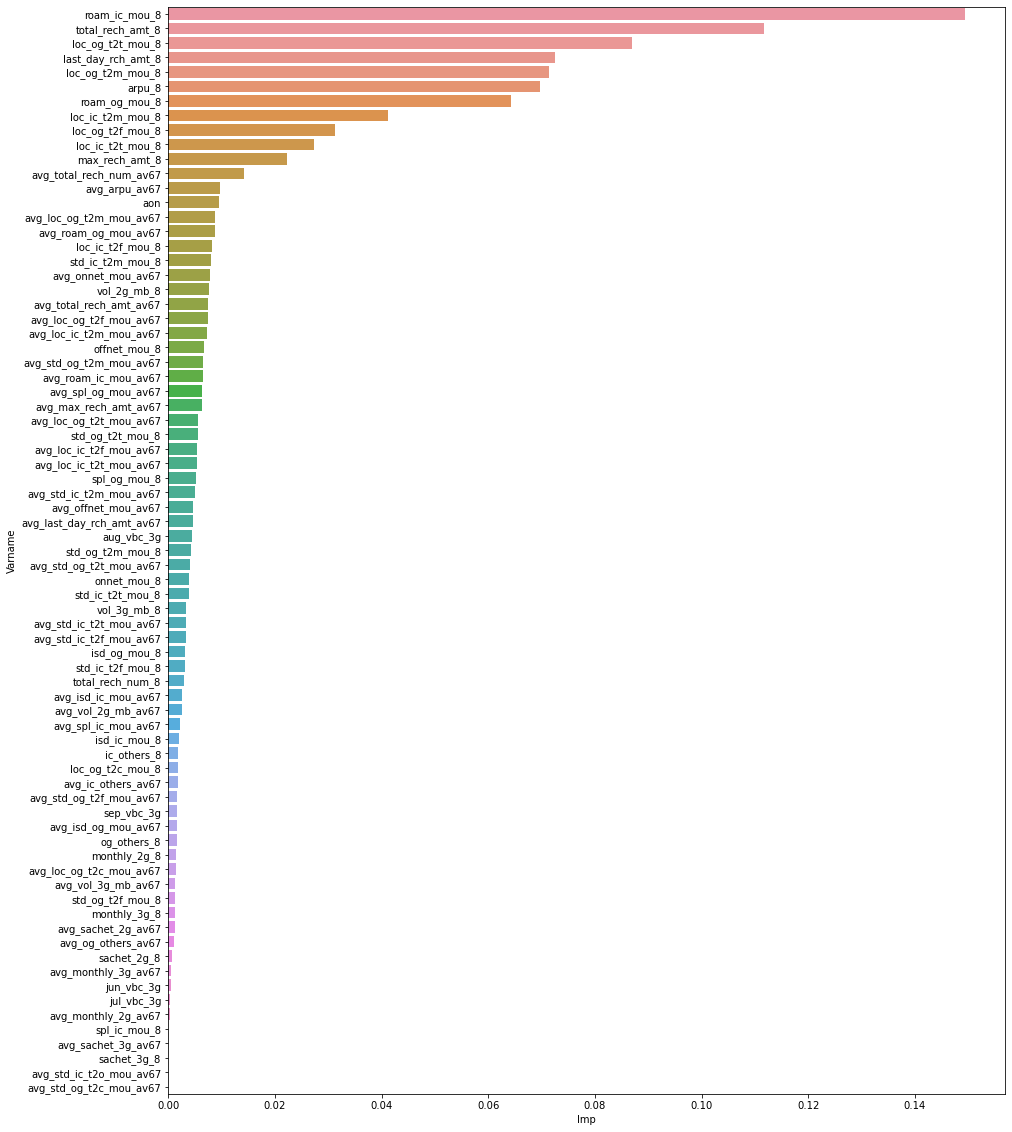

In [160]:

plt.figure(figsize=(15,20))
sns.barplot(x=imp_df['Imp'],y=imp_df['Varname'])

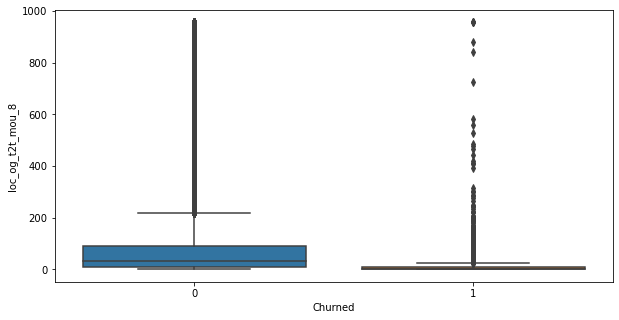

In [161]:
plt.figure(figsize= (10,5))
sns.boxplot(df1.Churned,df1.loc_og_t2t_mou_8)
plt.show()

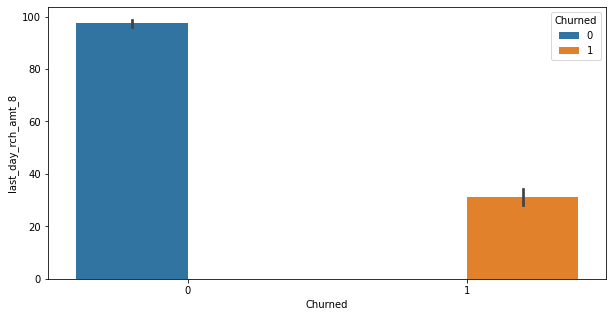

In [162]:
plt.figure(figsize= (10,5))
sns.barplot(x = df1['Churned'],y = df1['last_day_rch_amt_8'],hue=df1["Churned"])
plt.show()


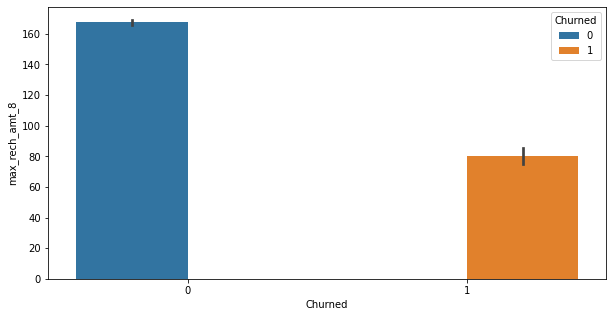

In [163]:
plt.figure(figsize= (10,5))
sns.barplot(y=df1['max_rech_amt_8'],x=df1["Churned"],hue=df1["Churned"])
plt.show()


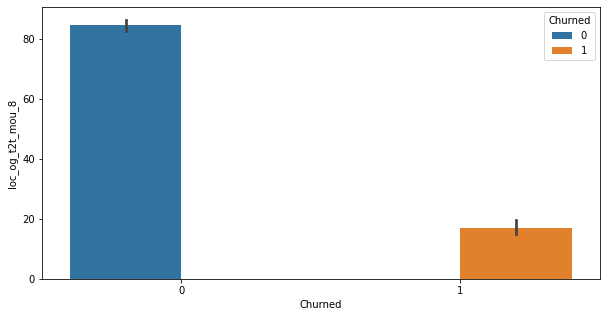

In [164]:

plt.figure(figsize= (10,5))
sns.barplot(y=df1['loc_og_t2t_mou_8'],x=df1["Churned"],hue=df1["Churned"])
plt.show()


### Business Insights from EDA
- Average Revenue drops in 8th month for Churned customers.
- 2G/3G usage is higher for non-churned customers and low for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.
- Median of recharge amount for Action Period is very low for Churned customers.

### Strategies:
- Customers who have the minimum max_rech_amt and total recharge amount of action phase i.e 8th month  should be focused and shouldbe given discounts while recharging.
- Customers with lower mass of usage should be targeted
- we must provide extra schemes or discounts to the customers whom model is predicting churn. 
- we can benifit them with extra free calls per day, to attract them to use our network.
- we can increase their validity period.
